# Author : Sneha M
# Data Science & Business Analytics Internship
# GRIP - The Spark Foundation
# TASK 3 - Perform ‘Exploratory Data Analysis’ on dataset
# Objective :
# 1. As a business manager, try to find out the weak areas where you can work to make more profit.
# 2.What all business problems you can derive by exploring the data?

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# EDA

In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.shape

(9994, 13)

What are total Sales and Profits of the company?

In [7]:
s = df['Sales'].sum()
p = df['Profit'].sum()
print("Total sales in US = ",s)
print("Total profit in US = ",p)

Total sales in US =  2297200.8603
Total profit in US =  286397.0217


Top 10 States by Sales and Profits

In [8]:
Top_10_Sales = df.groupby("State").Sales.sum().nlargest(n =10)
Top_10_Profits = df.groupby("State").Profit.sum().nlargest(n =10)

In [9]:
Top_10_Sales

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64

In [10]:
Top_10_Profits

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

In [11]:
Top_10_Sales.index


Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'],
      dtype='object', name='State')

In [12]:
Top_10_Profits.index


Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')

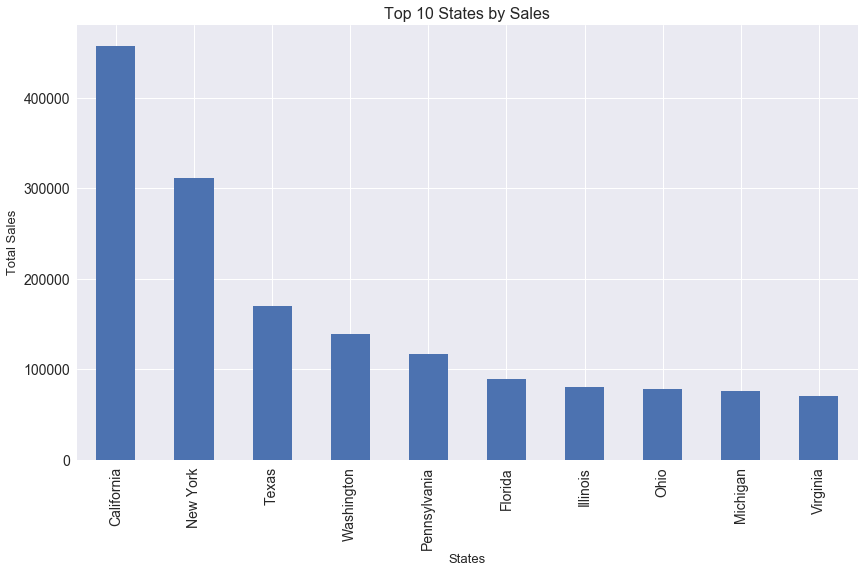

In [13]:
plt.style.use('seaborn')
Top_10_Sales.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 States by Sales",fontsize =16)
plt.show()

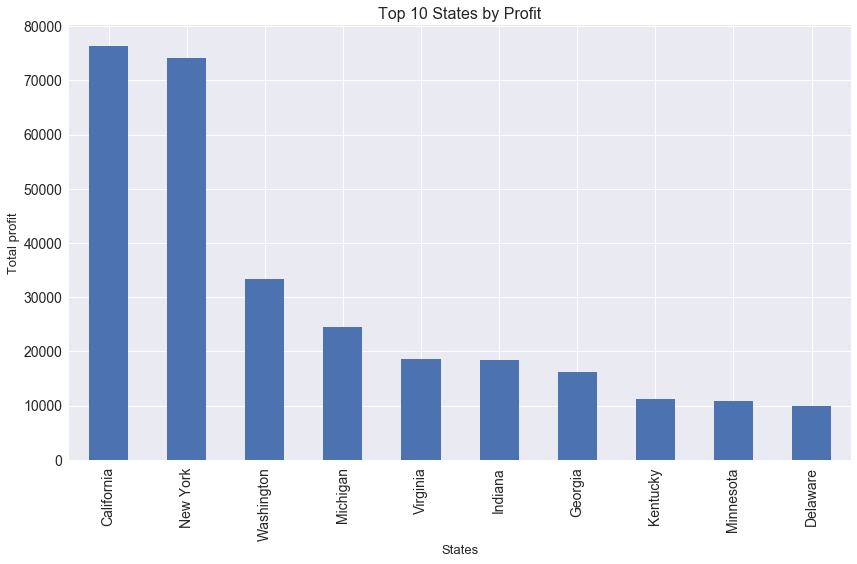

In [14]:
plt.style.use('seaborn')
Top_10_Profits.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total profit",fontsize =13)
plt.title("Top 10 States by Profit",fontsize =16)
plt.show()

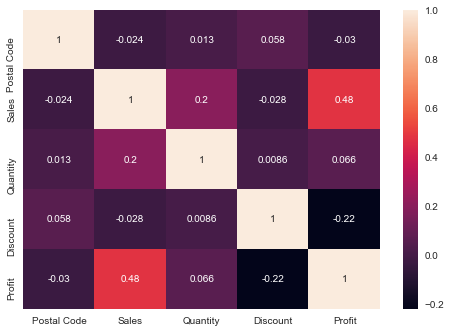

In [15]:
sns.heatmap(df.corr(), annot = True)

In [16]:
data_con = df.select_dtypes(include=[np.number])
data_con

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164
...,...,...,...,...,...
9989,33180,25.2480,3,0.20,4.1028
9990,92627,91.9600,2,0.00,15.6332
9991,92627,258.5760,2,0.20,19.3932
9992,92627,29.6000,4,0.00,13.3200


In [ ]:
from plotly import __version__
import cufflinks as cf


In [ ]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot

init_notebook_mode(connected=True)

cf.go_offline()

In [17]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Counting number of unique entries :

In [18]:
for col in df.columns:
    if df[col].dtype=='object':
        print("Number of unique entries in",col + " are",df[col].nunique())
        print("-----------------------------------------------------------")

Number of unique entries in Ship Mode are 4
-----------------------------------------------------------
Number of unique entries in Segment are 3
-----------------------------------------------------------
Number of unique entries in Country are 1
-----------------------------------------------------------
Number of unique entries in City are 531
-----------------------------------------------------------
Number of unique entries in State are 49
-----------------------------------------------------------
Number of unique entries in Region are 4
-----------------------------------------------------------
Number of unique entries in Category are 3
-----------------------------------------------------------
Number of unique entries in Sub-Category are 17
-----------------------------------------------------------


In [ ]:
df.iplot(x="Region", y="Sales",kind='bar',title='Region VS Sales',xTitle='Region',yTitle='Sales') #visualisation


# There are more sales in West Region and least at south region¶


In [ ]:
df.iplot(x="Region", y="Profit",kind='bar',title='Region VS Profit',xTitle='Region',yTitle='Profit',color='green') #visualisation


In [ ]:
df.iplot(x="Region", y="Discount",kind='bar',title='Region VS Discount',xTitle='Region',yTitle='Discount',color='green')


## More Profit in WEST and loss in CENTRAL
## Both profit and loss is more in EAST
## More discount in Central Region

In [ ]:
df.iplot(x="Discount", y="Sales",kind='bar',title='Discount VS Sales',xTitle='Discount',yTitle='Sales') #visualisation


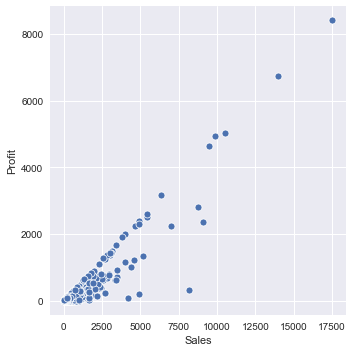

In [21]:
data=df[df['Discount']==0]
sns.relplot(x='Sales',y='Profit',data=data)

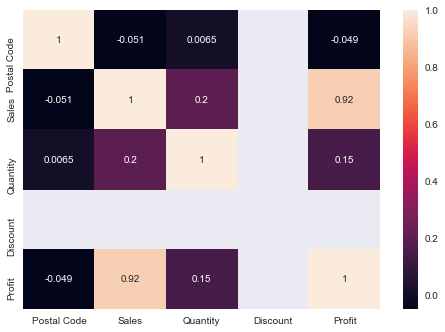

In [22]:
correlation=data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

## There is more discount at 0
## Hence we say that in above 2 graphs having 0 discount there positive relation between Profit and sales. Now we plot heat_map to get correlation
## Hence, we see that There is strong correlation between sales and Profit i.e 0.92

In [23]:
pd.crosstab(index=df['Category'],columns='count')


col_0,count
Category,
Furniture,2121
Office Supplies,6026
Technology,1847


In [24]:
pd.crosstab(index=df['Segment'],columns='count')


col_0,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


In [25]:
pd.crosstab(index=df['Sub-Category'],columns='count')


col_0,count
Sub-Category,
Accessories,775
Appliances,466
Art,796
Binders,1523
Bookcases,228
Chairs,617
Copiers,68
Envelopes,254
Fasteners,217


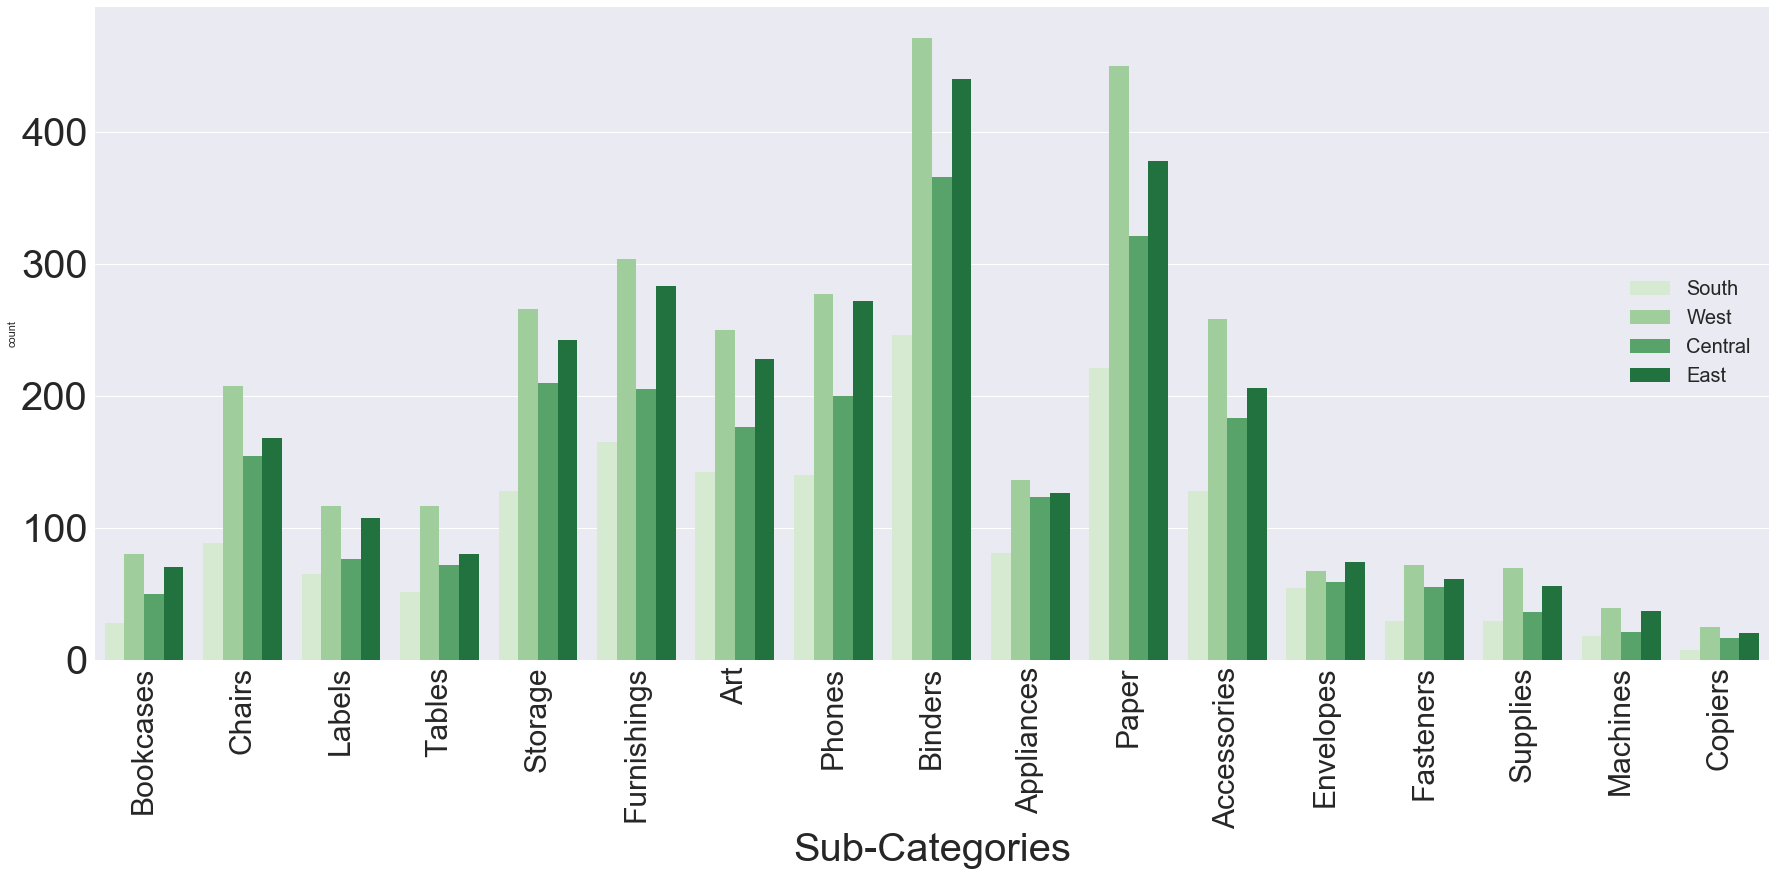

In [26]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Sub-Category', hue = 'Region', data = df, palette = 'Greens')
plt.xticks(rotation = 90, fontsize = 30)
plt.yticks(fontsize = 40)
plt.xlabel('Sub-Categories',fontsize = 40)
plt.legend(loc = 5, fontsize = 20)

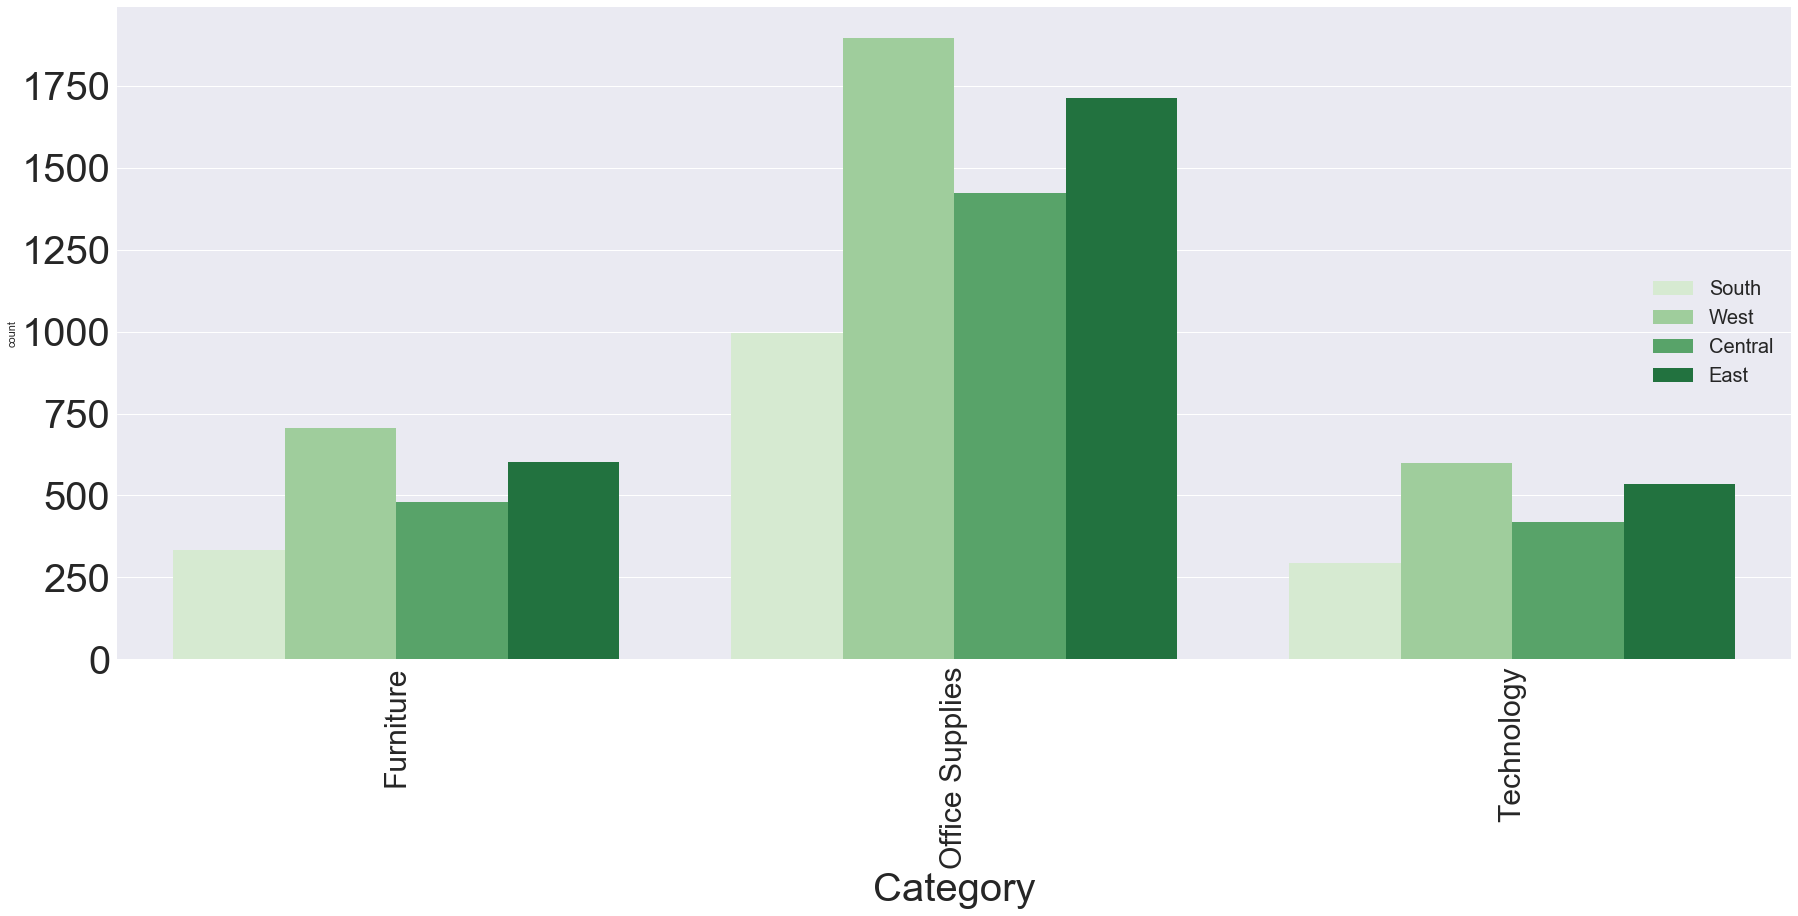

In [27]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Category', hue = 'Region', data = df, palette = 'Greens')
plt.xticks(rotation = 90, fontsize = 30)
plt.yticks(fontsize = 40)
plt.xlabel('Category',fontsize = 40)
plt.legend(loc = 5, fontsize = 20)

## From the above count plot, we can conclude that people residing in the west region order more as compared to other regions



# Data count by category


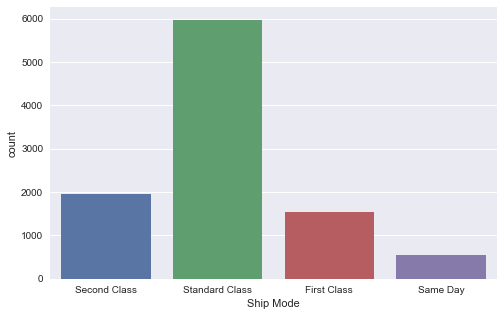

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Ship Mode'])

#### Standard class is more in all Ship mode

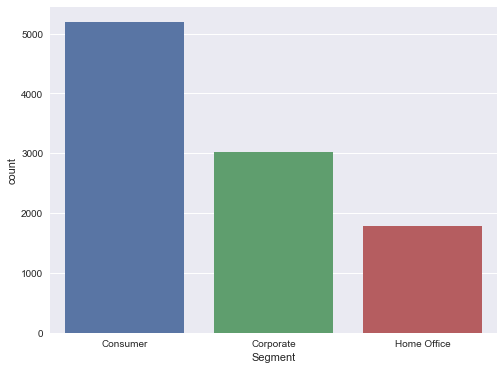

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Segment'])
plt.show()


#### Consumer is more in all Segments and Home office is less in all Segment



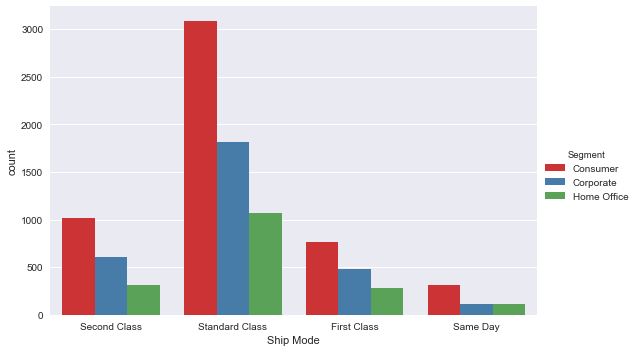

In [33]:
sns.catplot("Ship Mode", hue="Segment", data=df, kind="count", aspect=1.5, palette="Set1")


#### Standard class is more in all classes as compare to others and consumer is more in all other modes



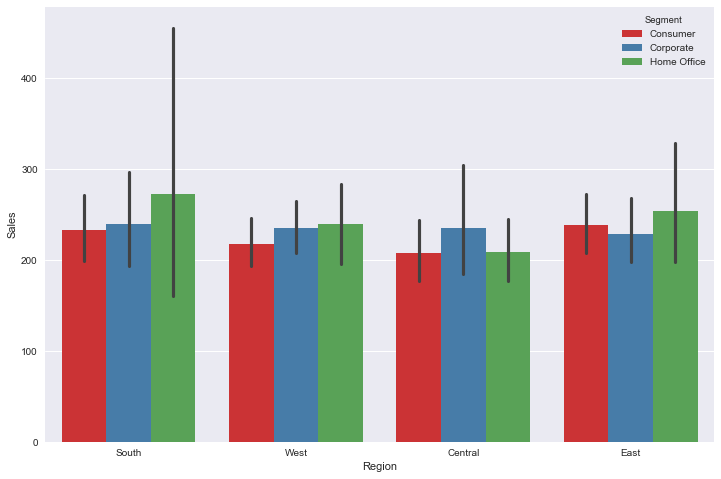

In [34]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=df, palette="Set1")

#### This Graph shows tells that all are equal atmost but Home Office is greater in all except central Region


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

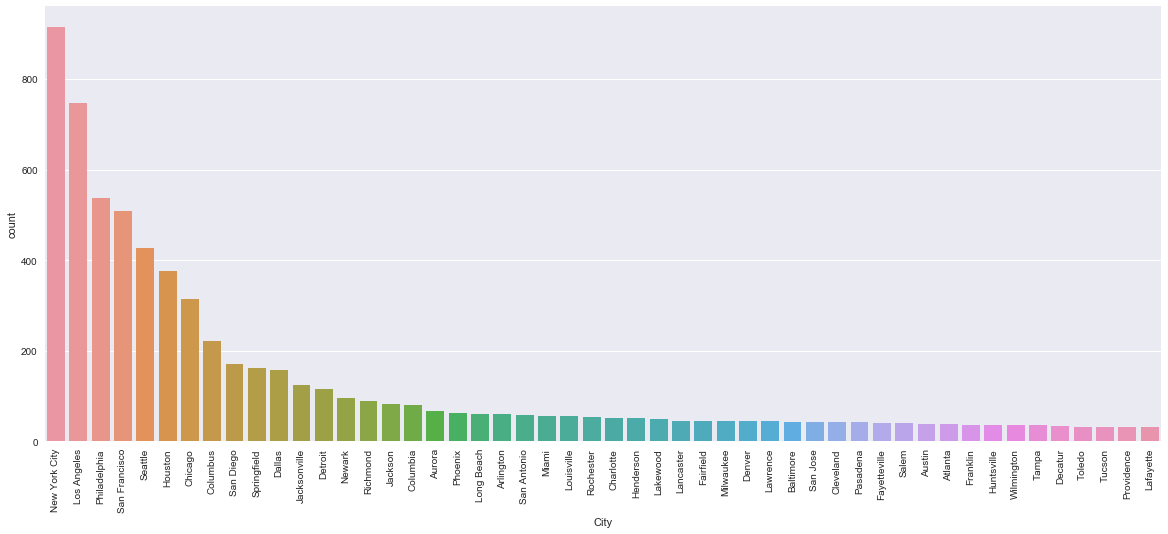

In [35]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['City'], order=(df['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)

# Sales by category and Sub - category¶


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

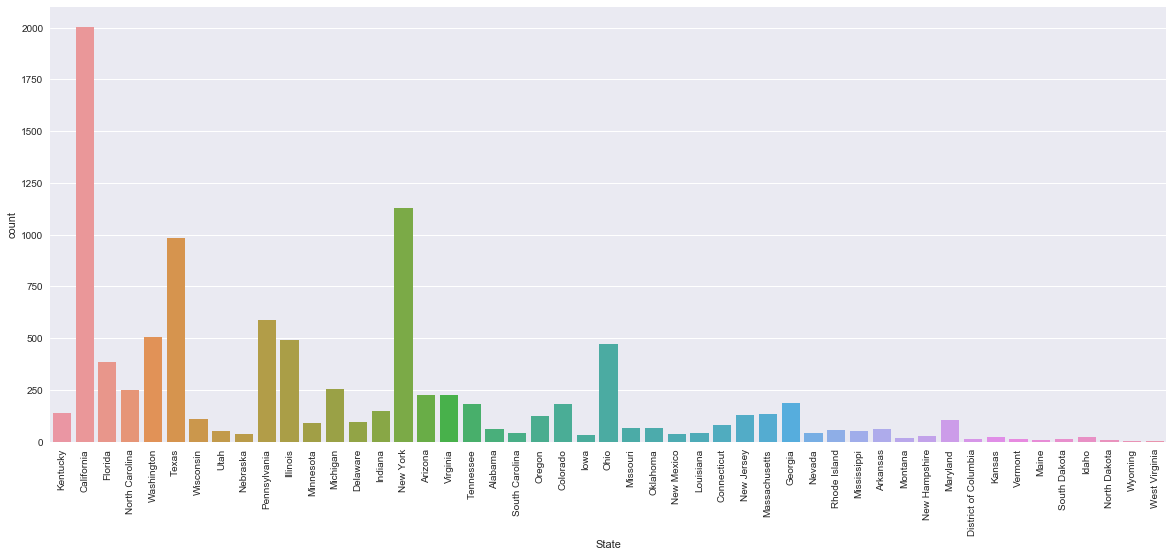

In [36]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)

In [ ]:
df.iplot(x="Sub-Category", y="Sales",kind='bar',colors='violet',
         title='Sub_Category VS Sales',xTitle='Sub_Category',yTitle='Sales')

### Sub catergory with more sales

#### phones
#### chairs
#### storage
#### Tables
#### Binders
#### Machines

Text(0, 0.5, 'Sales')

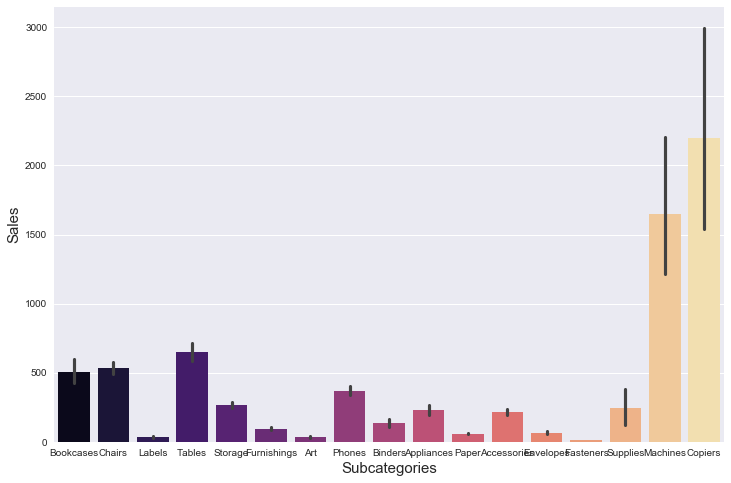

In [38]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Sales", data=df, palette="magma")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

### More in Copiers and Machines as compared to others


In [ ]:
df.iplot(x="Category", y="Sales",kind='bar',colors='yellow',
         title='Category VS Sales',xTitle='Category',yTitle='Sales',)

Text(0, 0.5, 'Sales')

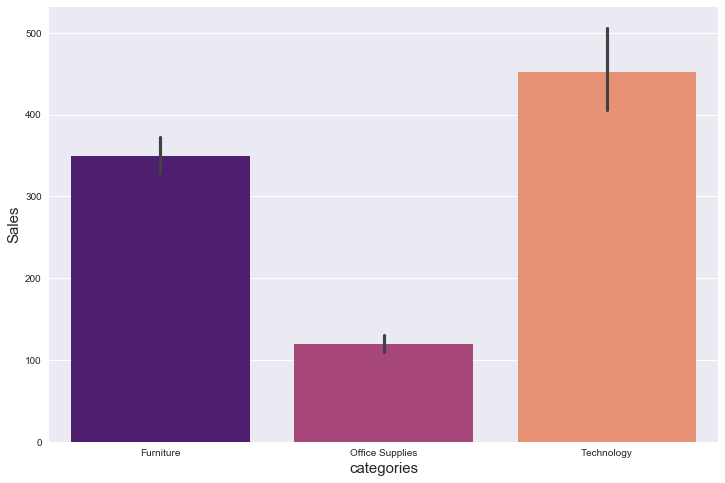

In [39]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Sales", data=df, palette="magma")
plt.xlabel("categories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

### Technology is more and less in Office


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

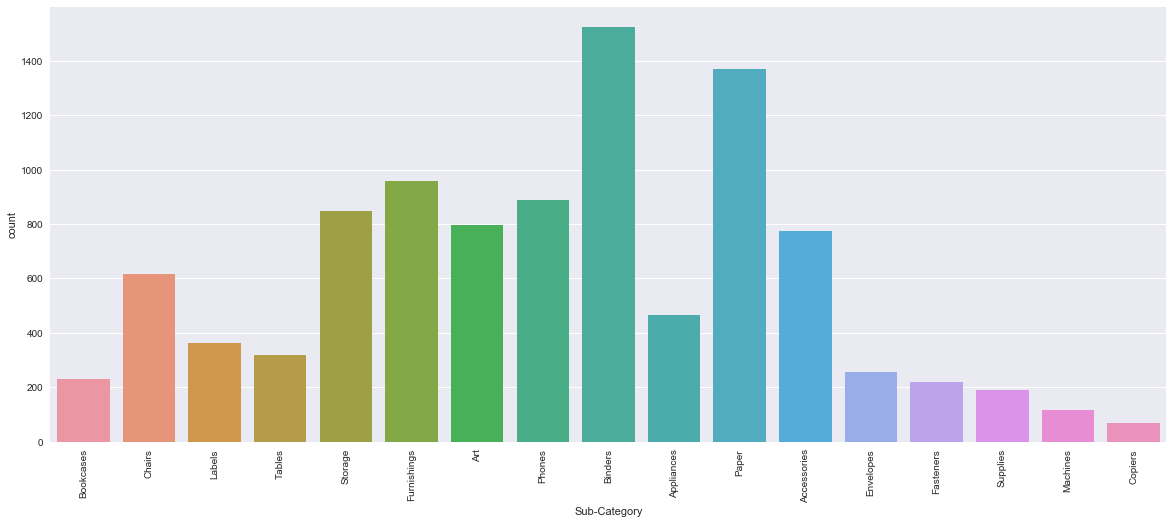

In [40]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)

### Highest - Binders , Paper , Furnishing , Storage , Accessories , Chair


# Profit by sub-category and Category

In [ ]:
df.iplot(x="Sub-Category", y="Profit",kind='bar',title='Sub-Category VS Profit',xTitle='Sub-Category',yTitle='Profit',color='red') #visualisation


### More loss is in Binder , Tables , Machines , Chair ,BookCases

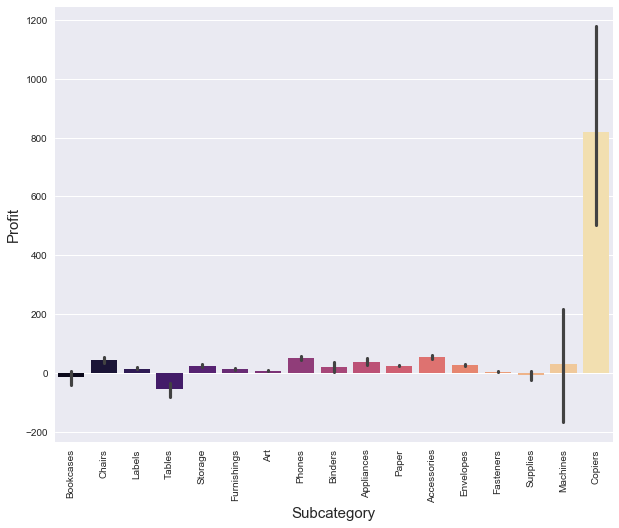

In [20]:
plt.figure(figsize=[10,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=df, palette="magma")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.iplot(x="Category", y="Profit",kind='bar',title='Category VS Profit',xTitle='Category',yTitle='Profit',color='red') #visualisation


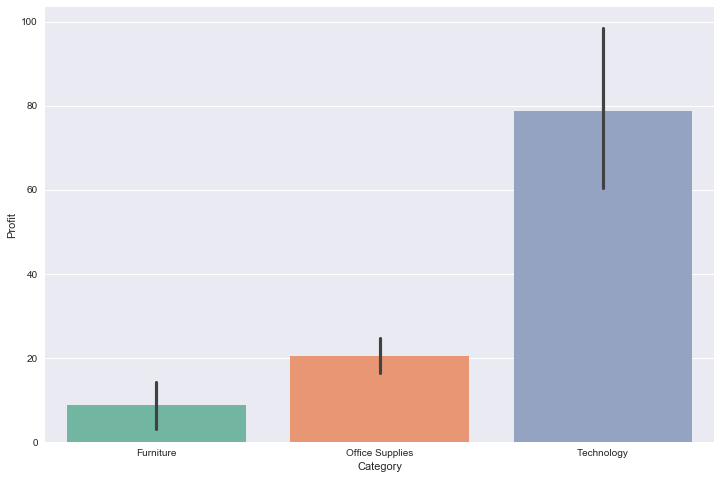

In [23]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Profit", data=df, palette="Set2")


### Technology gives you more profit and Furniture gives you more loss



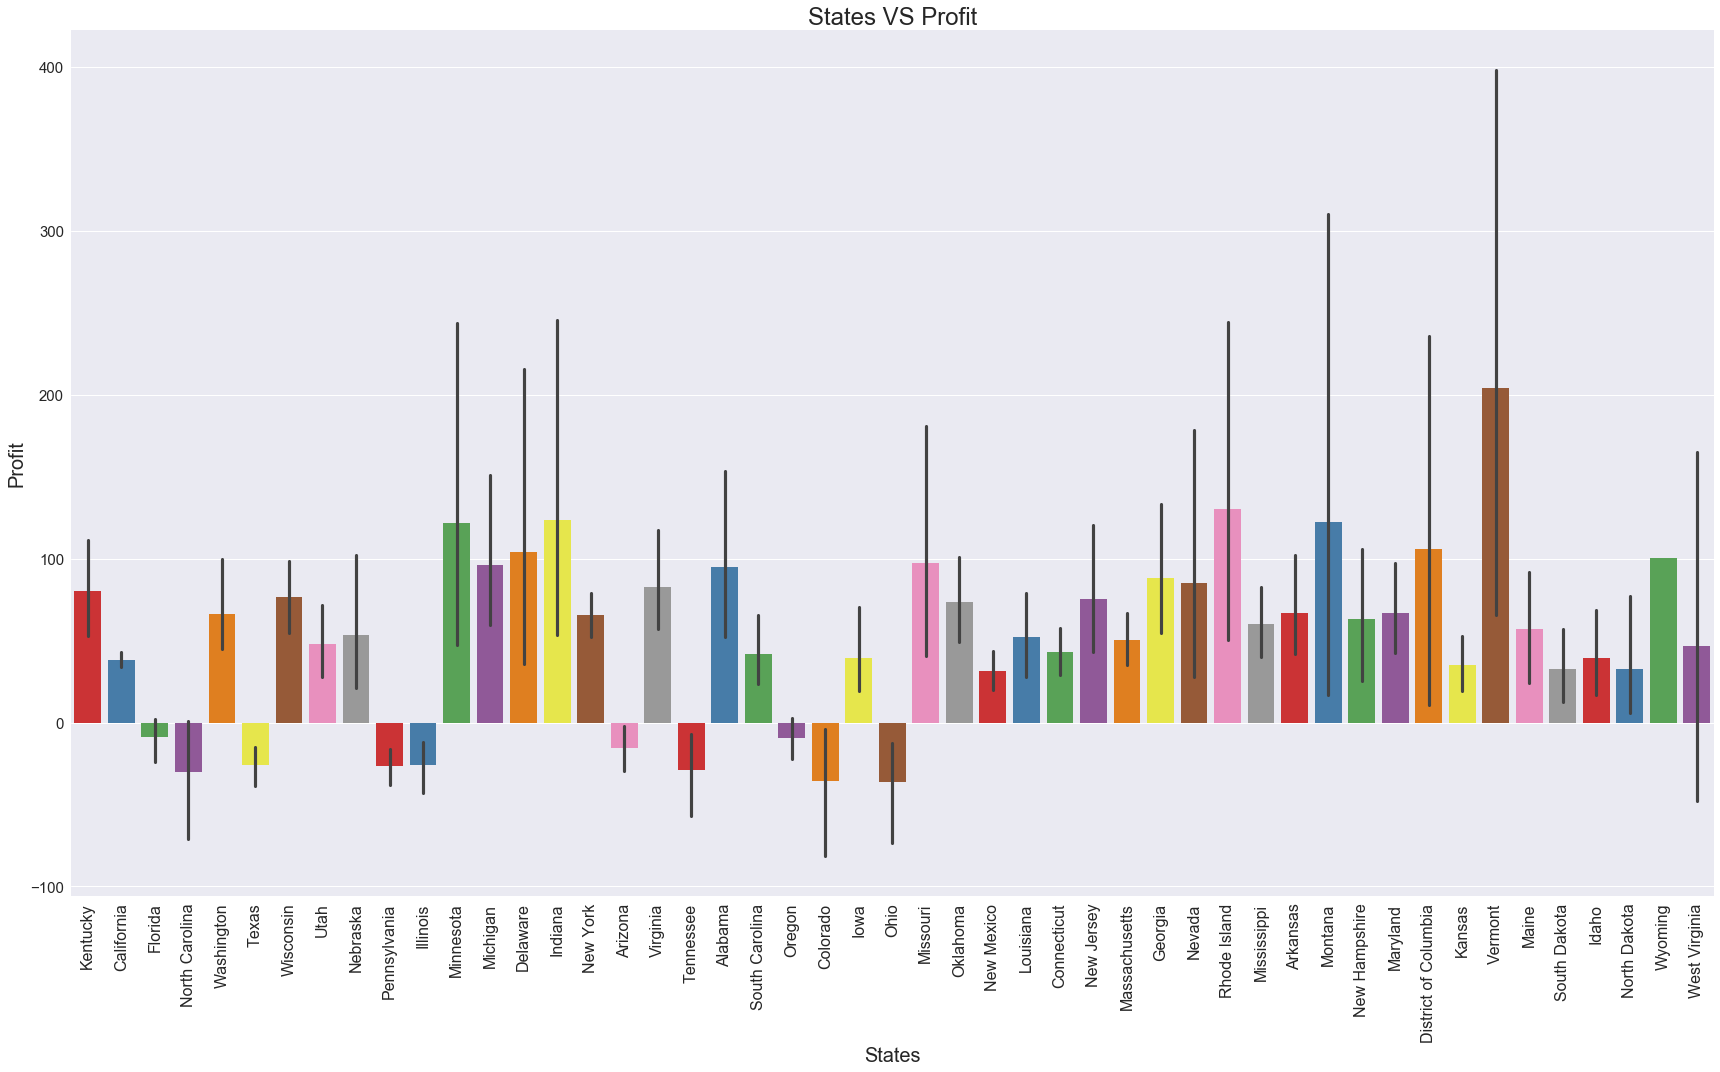

In [24]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=df, palette="Set1",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

In [ ]:
df.iplot(x="State", y="Profit",kind='bar',title='State VS Profit',xTitle='State',yTitle='Profit',color='red') #visualisation


### States with more loss are Ohio , Texas , Illinos , Minnesota , Tennessee , Arizona , Pennsylvania



In [25]:
pivot1=pd.pivot_table(df,index='Sub-Category',values='Discount')
#pivot.plot(kind='bar')
pivot1

,Discount
Sub-Category,
Accessories,0.078452
Appliances,0.166524
Art,0.074874
Binders,0.372292
Bookcases,0.211140
Chairs,0.170178
Copiers,0.161765
Envelopes,0.080315
Fasteners,0.082028


In [26]:
pivot=pd.pivot_table(df,index='Category',values='Discount')
#pivot.plot(kind='bar')
pivot

,Discount
Category,
Furniture,0.173923
Office Supplies,0.157285
Technology,0.132323


### There is more discount in Furnitures

# SUMMARY POINTS TO CONCLUDE
### 1)Total sales in US is 2296195.5903
### 2)Total profit in US is 286241.4226
### 3)Top 10 States by Sales: 'California', 'New York', 'Texas', 'Washington', 'Pennsylvania','Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'
### 4)Top 10 States by Profit: 'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'
### 4)California and New York are far ahead of their competitor states in terms of Profits.


# Factors which are co-related

#### sales and profits are positively correlated
#### Discount and Profits are Negatively correlated
#### There is more discount at value 0
#### Hence we say that in above 2 graphs having 0 discount there positive relation between Profit and sales.
#### Hence, we see that There is strong correlation between sales and Profit i.e 0.92 .
#### Regions with Sub-Category-Here West and east have high no of sub category .
#### we can conclude that people residing in the west region order more as compared to other regions.
#### Standard class is more in all Ship mode.
#### Consumer is more in all Segments and Home office is less in all Segment.
#### Standard class is more in all classes as compare to others and consumer is more in all other modes.
#### In Segment section It tells that all are equal atmost but Home Office is greater in all except in central Region.

### Sub catergory with more sales

#### *phones
#### *chairs
#### *storage
#### *Tables
#### *Binders
#### *Machines


#### 1.Sales are more in Copiers and Machines as compared to others in Sub-Catergory .
#### 2.Sales are more in Technology and less in Office under Category.
#### 3.Highest count in sub-category - Binders , Paper , Furnishing , Storage , Accessories .
#### 4.There is More loss in Binder , Tables , Machines , Chair ,BookCases as compared to profits in Sub-Caterogry.
#### 5.products like phones and copiers give more profit in Catergory.
#### 6.Technology gives you more profit in Catergory.
#### 7.Furniture gives you more loss in Catergory .
#### 8.States with more loss are Ohio , Texas , Illinos , Minnesota , Tennessee , Arizona , Pennsylvania .
#### 9.States with more profit are California and New York .
#### 10.Sub-Catergory with more discount are Binders , Bookcases , Machines , Tables .
#### 11.Catergory with more discount in Furnitures .

# From All these analysis we can finally conclude that :-

### 1) If we give more Discount on products , our sales goes increses but Profit get down.

### 2) In Technology category business we get more Profit as compared to other two business Catergory.These is because of we given less Discount of 0.13.

### 3) Here we also focus on our Office under category because sales of these category is less as compared to other two.

### 4) we should also focus on Furniture because there is more loss and more discount given to this Catergory.

### 5) we should focus on 'Fasteners','labels', 'Supplies'and 'Art' sub-category businesses .

### 6) For more profits , we need to sell consumer segment products more .

### 7) For increasing the profits , we need to sell more to the states which are liking our products like NEWYORK and CALIFORNIA .

### Hence To get good profit in any business you have to focus on increasing sales but not giving more discount

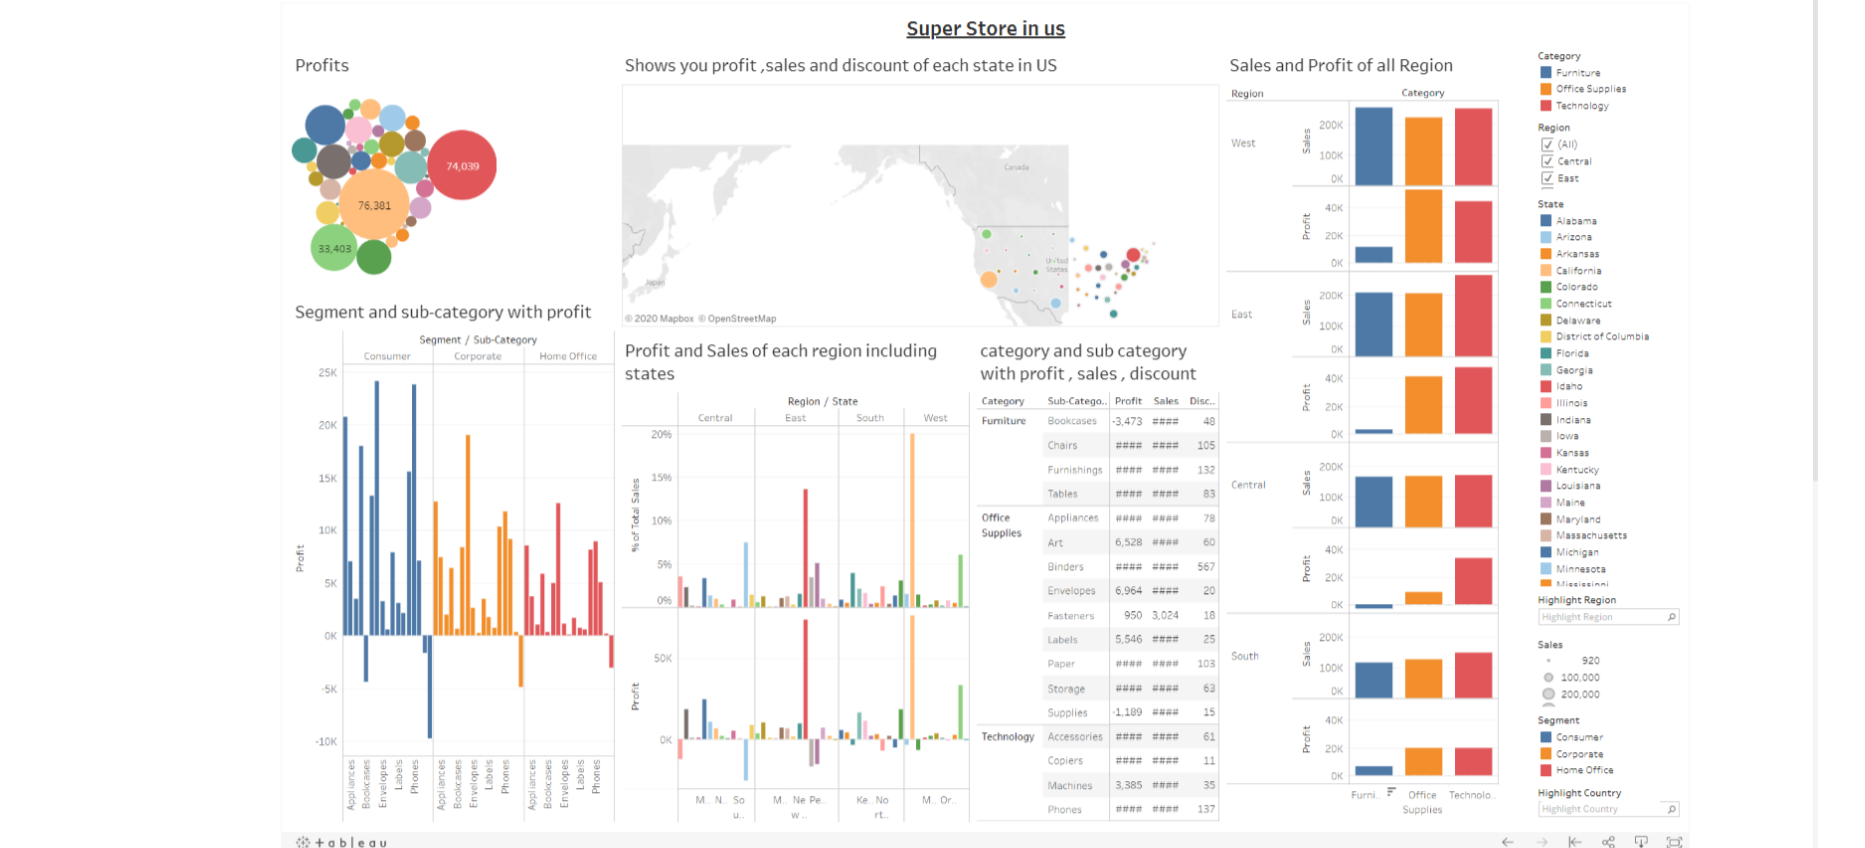

In [27]:
from IPython.display import Image
Image(filename='Tableau.png')


# Thank you !